In [1]:
import pandas as pd

df = pd.read_parquet("/home/user5/text/.data/dataset.parquet")

df

,text,label
0,Всем здравствуйте. Заказывал помощь.\nОчень до...,positive
1,Божественные чебуреки легендарная чебуречная и...,positive
2,"Платье получила, качество отличное, сшито очен...",positive
3,Оформила карту Камкомбанка быстро и удобно. Ка...,positive
4,Катались на их снаряжении. Порадовала цена. Вс...,positive
...,...,...
228459,"Бля я и забыл, какой он ахуенный!",positive
228460,"История о том, как мои любимые одногруппнички ...",neutral
228461,Коллективно жмём F13! И наблюдаем за результатом!,neutral
228462,ану ка быстро цоя добавь!,neutral


In [3]:
df["label"].value_counts()

label
positive    101167
negative     85824
neutral      41473
Name: count, dtype: int64

<Axes: >

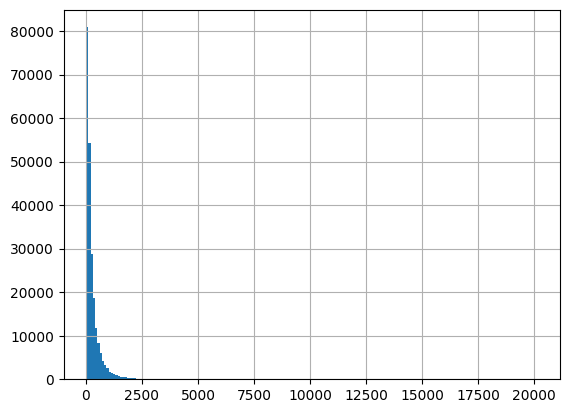

In [7]:
df["text_sizes"] = df["text"].apply(lambda x: len(x))
df["text_sizes"].hist(bins=200)

/tmp/ipykernel_2399061/3185890201.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df["text_sizes"] > 2500][df["text_sizes"] < 7500]["text_sizes"].hist(bins=15)


<Axes: >

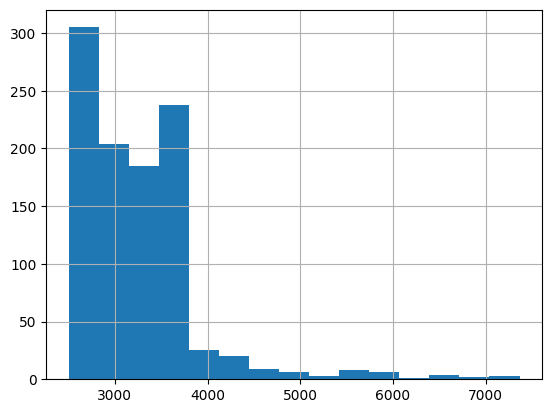

In [23]:
df[df["text_sizes"] > 2500][df["text_sizes"] < 7500]["text_sizes"].hist(bins=15)

In [17]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("/home/user5/text/.models/mm-bert")

In [18]:
from tqdm import tqdm
tqdm.pandas()

df["tokens"] = df["text"].progress_apply(lambda x: tokenizer.encode(x))

100%|██████████| 228464/228464 [00:33<00:00, 6864.91it/s] 


In [19]:
df["tokens_lens"] = df["tokens"].apply(lambda x: len(x))

<Axes: >

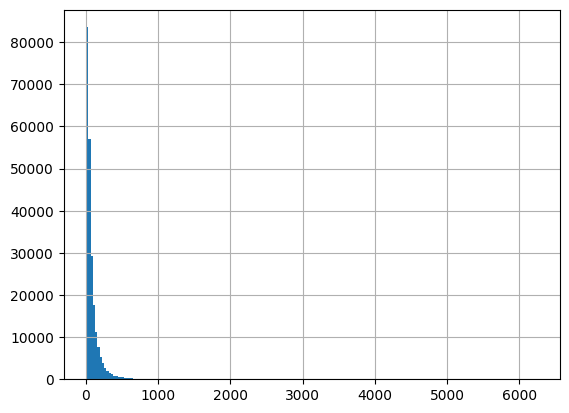

In [20]:
df["tokens_lens"].hist(bins=200)